In [32]:
import pandas as pd
import pickle

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import sys
sys.path.insert(0, './../../preprocessing')

In [35]:
import session as ss

In [36]:
def load_data():
    t = pickle.load( open( "./../../data_set.p", "rb" ) )
    t = ss.define_session(t)
    return t

In [37]:
df = load_data()

3584043


In [38]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [39]:
corpus = []
for uuid, row in df.groupby('UUID'):
    session = []
    for a in row['action_cleaned']:
        session.append(a)
    corpus.append(session)

total_examples = len(corpus)
print('num sessions', total_examples)
print('total num events',len(df)) 

num sessions 200324
total num events 3584043


In [40]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(corpus)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(214 unique tokens: ['click_on_arrow', 'click_on_datacard', 'click_on_number_details', 'click_on_other', 'go_back_to_homepage']...)


In [41]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print(len(doc_term_matrix))
print(doc_term_matrix[100])

200324
[(3, 1), (5, 1), (9, 1), (30, 1), (34, 2), (40, 1), (43, 1), (44, 4), (46, 1), (47, 1)]


In [42]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=17, id2word = dictionary, passes=50)
print('used: {:.2f}s'.format(time()-start))

used: 1558.08s


In [13]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(3, '0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail"'), (12, '0.543*"click_on_name" + 0.216*"click_on_subscription" + 0.094*"load_homepage" + 0.040*"click_on_menu_accounts"')]


In [14]:
for i in ldamodel.print_topics(): 
    for j in i: print(j)

0
0.398*"click_on_save" + 0.250*"click_on_edit_field" + 0.103*"click_on_number_details" + 0.073*"click_on_MBN_sub" + 0.043*"click_on_new_settings" + 0.033*"click_on_user_type" + 0.031*"click_on_find_person" + 0.028*"load_other_page" + 0.022*"click_on_cancel" + 0.014*"click_on_reference"
1
0.306*"open_invoice_account" + 0.129*"click_on_number_details" + 0.123*"click_on_company" + 0.085*"click_on_menu_subscriptions" + 0.054*"click_on_confirm" + 0.043*"click_on_get_report" + 0.041*"load_homepage" + 0.040*"click_on_new_report" + 0.033*"scroll_on_reports_page" + 0.031*"load_other_page"
2
0.260*"click_on_change_account" + 0.246*"click_on_arrow" + 0.085*"click_on_activate" + 0.081*"click_on_number_details" + 0.075*"activate_new" + 0.052*"click_on_sim_card" + 0.040*"load_homepage" + 0.029*"click_on_add" + 0.026*"loading subscriptions" + 0.025*"click_on_navicon"
3
0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail" + 0.080*"load_h

In [43]:
ldamodel.save('17_topics/topic.model')

In [41]:
from gensim.models import LdaModel
loading = LdaModel.load('10_topics/topic.model')

In [23]:
print(loading.print_topics(num_topics=2, num_words=4))

[(2, '0.297*"click_log_out" + 0.184*"load_homepage" + 0.112*"click_on_confirm" + 0.097*"account_reference"'), (1, '0.114*"go_back_to_homepage" + 0.107*"click_on_agreements" + 0.085*"adding_additional_services" + 0.073*"load_homepage"')]


In [44]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [45]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('17_topics/topic.model')

In [46]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.150200  0.060441       1        1  10.841875
0      0.193694 -0.013709       2        1  10.834135
1      0.270103  0.100826       3        1   9.436456
2     -0.053815 -0.224183       4        1   8.743062
16    -0.020026  0.252700       5        1   7.591507
3     -0.116376 -0.190144       6        1   7.106411
11    -0.210584  0.146448       7        1   5.630304
13     0.252791  0.092415       8        1   5.147222
4     -0.110717 -0.035141       9        1   4.934363
6      0.084971 -0.075332      10        1   4.770236
8      0.323312 -0.011650      11        1   4.293088
10    -0.125835  0.027579      12        1   4.292578
9      0.085084 -0.238923      13        1   3.754935
7     -0.114590  0.100404      14        1   3.742223
14    -0.118790  0.189103      15        1   3.629399
5     -0.139545 -0.199223      16        1   3.091873
15    -0.049477  0.018388      17        1   2.160331, topic_info=     Category           Freq                                 Term  \
term                                                                
16    Default  396792.000000                   scroll_on_homepage   
54    Default  192690.000000          interact_with_pop_up_window   
6     Default  204108.000000                               search   
3     Default  118019.000000                       click_on_other   
36    Default   85867.000000               empty_subselect_ignore   
2     Default  267449.000000              click_on_number_details   
14    Default  183314.000000                click_on_subscription   
26    Default  157606.000000                        click_on_name   
34    Default   77214.000000                        click_log_out   
44    Default   81674.000000           click_next_in_subscr_order   
42    Default   80288.000000                         submit_order   
0     Default   56523.000000                       click_on_arrow   
5     Default  196993.000000                        load_homepage   
28    Default   45359.000000                   click_on_terminate   
39    Default   69460.000000                        click_on_save   
20    Default   37664.000000                  click_on_agreements   
30    Default   72220.000000                 open_invoice_account   
57    Default   30918.000000                    account_reference   
66    Default   43440.000000         click_on_subscription_detail   
4     Default   63336.000000                  go_back_to_homepage   
35    Default   22960.000000                    click_on_activate   
59    Default   27563.000000              click_on_administrators   
33    Default   25755.000000                         activate_new   
37    Default   45123.000000                loading subscriptions   
15    Default   46971.000000                      load_other_page   
47    Default   35398.000000            click_on_new_subscription   
9     Default   72227.000000                     click_on_confirm   
21    Default   24163.000000                 click_on_bedrift_sub   
45    Default   39835.000000                  click_on_edit_field   
55    Default   24583.000000                       interrupt_task   
...       ...            ...                                  ...   
95    Topic17      99.874374                       click_on_price   
49    Topic17    1990.010986                    click_on_sim_card   
5     Topic17    9126.637695                        load_homepage   
213   Topic17       0.063257   order_overview_check_single_orders   
212   Topic17       0.063257    order_overview_check_other_orders   
4     Topic17    1295.692993                  go_back_to_homepage   
211   Topic17       0.063257                    click_on_feedback   
9     Topic17     432.313202                     click_on_confirm   
206   Topic17       0.063257                  click_on_mobile_sub   
210   Topic17       0.063257     

In [33]:
pyLDAvis.save_html(data,'vis.html')

In [34]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('./topic.model')

CPU times: user 3.1 ms, sys: 7 µs, total: 3.11 ms
Wall time: 2.71 ms


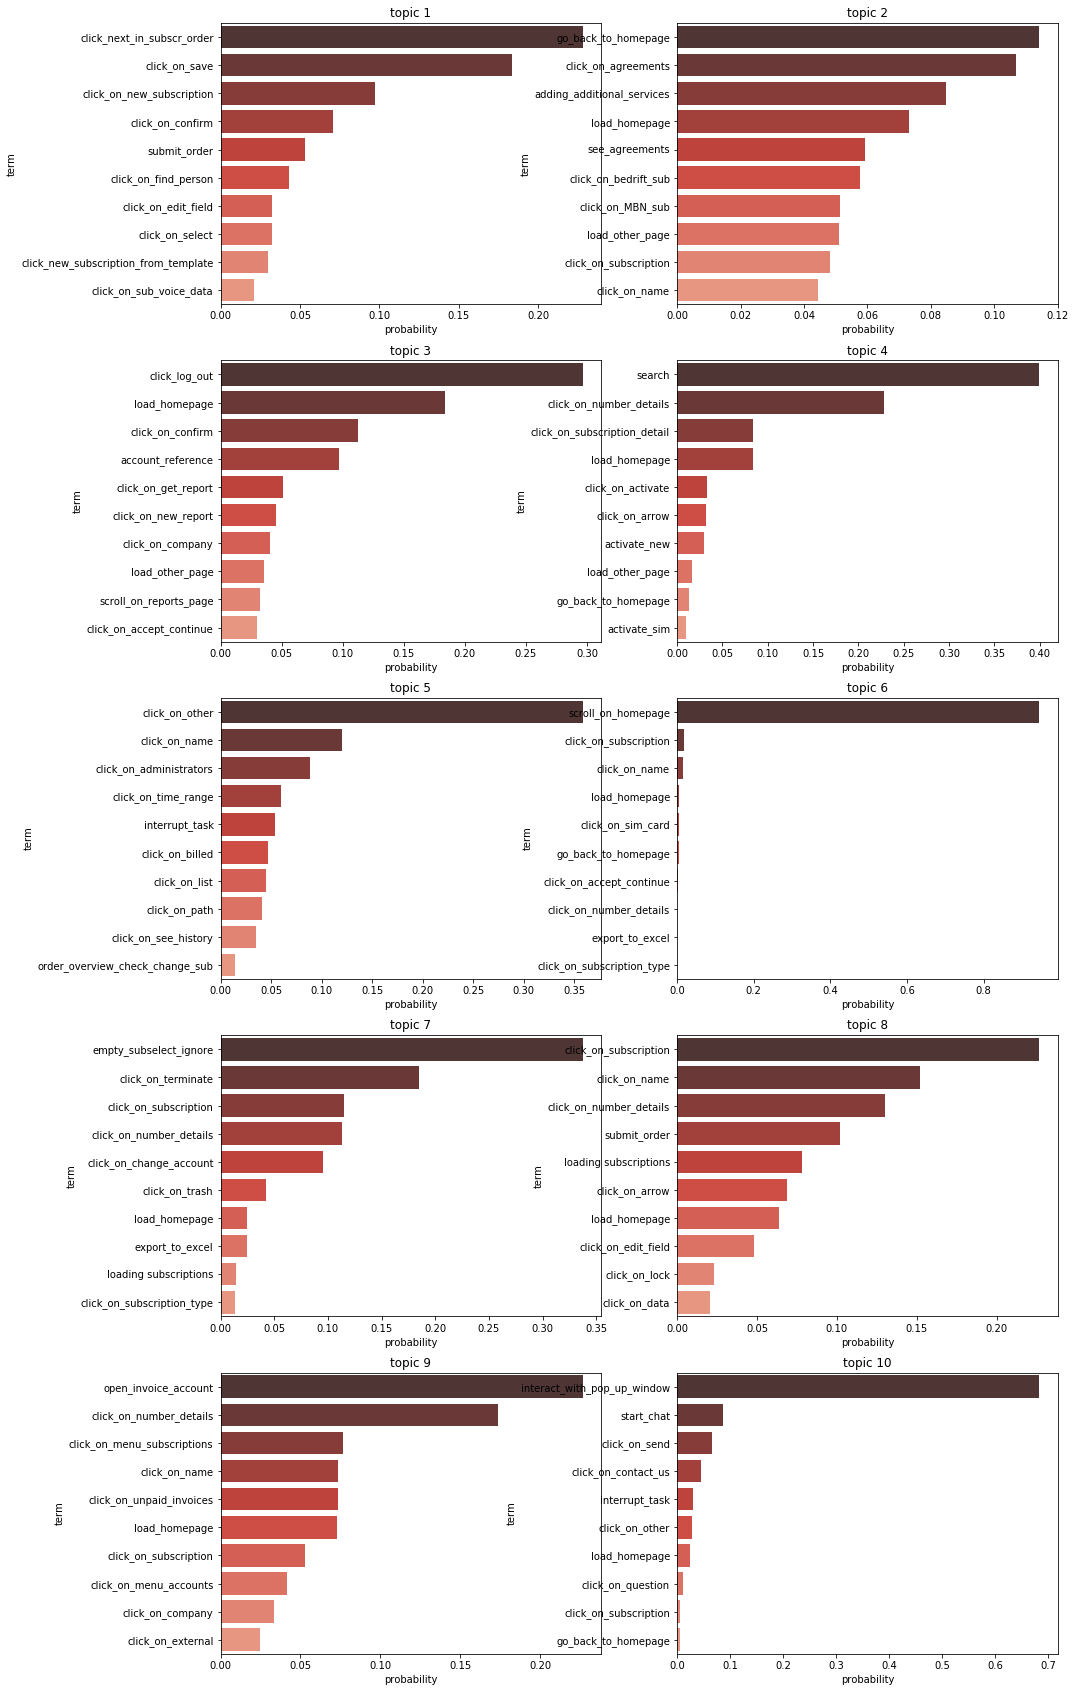

In [35]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    # df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    
plt.show()